# 최적의 모델 선택 방법
## 모델의 성능이 기대에 못 미칠경우 어떻게 개선할 것인가?
- 더 복잡하거나 더 유연한 모델을 사용
- 덜 복잡하거나 덜 유연한 모델을 사용
- 더 많은 훈련 표본을 수집
- 각 표본에 특징을 추가하기 위해 더 많은 데이터를 수집
## 정답은 없다!

# 편향-분산 트레이드오프
## 고편향 모델과 고분산 모델
- 언더피트: 과소적합. 모델이 고편향됨. 모델이 모든 특징을 적절히 설명할 수 있을 만큼 모델 유연성이 충분치 않음
- 오버피트: 과대적합. 모델이 고분산됨. 모델이 모든 특징을 세밀하게 설명할 수 있을 만큼 모델 유연성이 충분하지만, 훈련 데이터의 잡음까지 반영함


In [1]:
from sklearn.preprocessing import PolynomialFeatures   # 차수증가, 모델 복잡도를 조절하는데 사용
from sklearn.linear_model import LinearRegression   # 선형 모델 만들기
from sklearn.pipeline import make_pipeline          # pipeline에 등록하면 객체들이 심리스(seamless)하게 
                                                    # 수행이 되기 때문에 생산성이 높아짐
import numpy as np

In [3]:
np.random.seed(1)
X = np.random.rand(40, 1) ** 2
y = (10 - 1. / (X.ravel() + 0.1)) + np.random.randn(40)   # 약간의 오차를 줄 수 있게 만듦

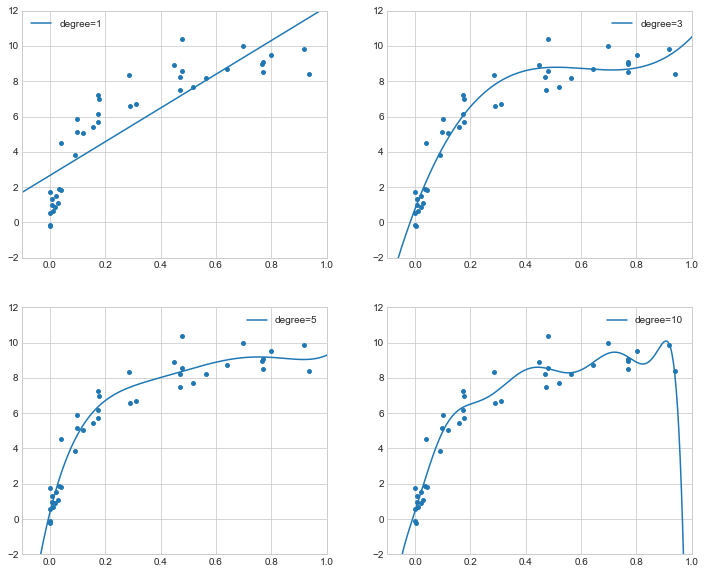

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.style.use("seaborn-whitegrid")

X_test = np.linspace(-0.1, 1.1, 500).reshape(-1, 1)

fig = plt.figure(figsize = (12, 10))
for i, degree in enumerate([1, 3, 5, 10], start = 1):
    ax = fig.add_subplot(2, 2, i)
    ax.scatter(X.ravel(), y, s = 15)
    y_test = make_pipeline(PolynomialFeatures(degree), LinearRegression()).fit(X, y).predict(X_test)
    ax.plot(X_test.ravel(), y_test, label = 'degree={0}'.format(degree))
    ax.set_xlim(-0.1, 1.0)
    ax.set_ylim(-2, 12)
    ax.legend(loc = 'best')

## 복잡도가 높아질수록 성능이 좋아지는 것 처럼 볼 수 있으나 노이즈가 발생할 수 있어 성능에 대한 판단이 필요함
- degree=1인 그래프는 고편향(underfit), degree=10인 그래프는 고분산(overfit)되었다고 말한다
- 언더피트된 모델은 복잡도를 높이고, 오버피트된 모델은 복잡도를 낮춰야 함

## 검증곡선
- 편향과 분산 사이의 트레이드오프에서 가장 효율적인 지점 => 최적의 모델
- 훈련 스코어와 검증 스코어가 둘 다 높은 지점이 최적

- 편향과 분산 사이의 최적의 트레이드 오프 => 3차 다항식

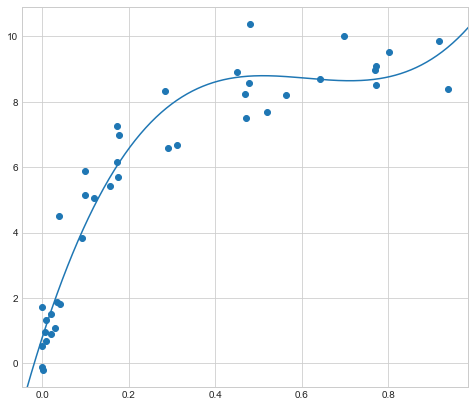

In [7]:
plt.figure(figsize = (8, 7))
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = make_pipeline(PolynomialFeatures(3),
                      LinearRegression()).fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test);
plt.axis(lim);

# 학습곡선
- 최적의 모델은 훈련 데이터의 규모에도 의존함
- 학습곡선: 훈련집합의 크기에 따른 훈련 점수/검증 점수의 플롯

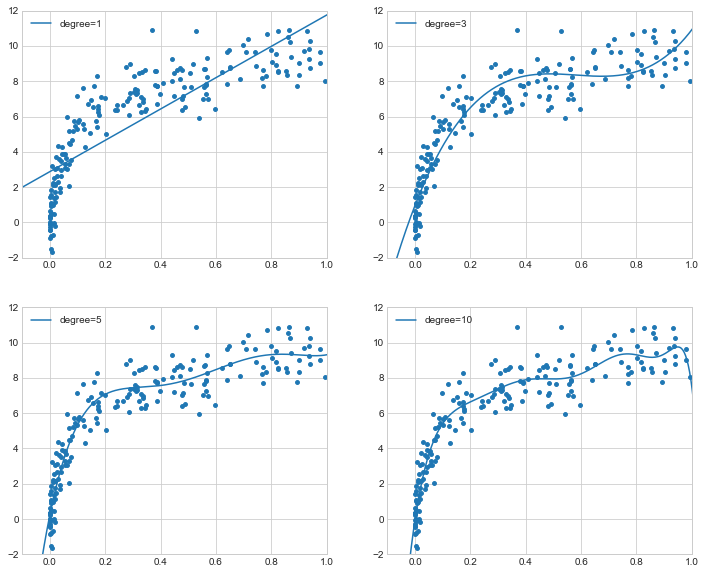

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

np.random.seed(1)
X = np.random.rand(200, 1) ** 2
y = (10 - 1. / (X.ravel() + 0.1)) + np.random.randn(200)   # 약간의 오차를 줄 수 있게 만듦
plt.style.use("seaborn-whitegrid")

X_test = np.linspace(-0.1, 1.1, 500).reshape(-1, 1)

fig = plt.figure(figsize = (12, 10))
for i, degree in enumerate([1, 3, 5, 10], start = 1):
    ax = fig.add_subplot(2, 2, i)
    ax.scatter(X.ravel(), y, s = 15)
    y_test = make_pipeline(PolynomialFeatures(degree), LinearRegression()).fit(X, y).predict(X_test)
    ax.plot(X_test.ravel(), y_test, label = 'degree={0}'.format(degree))
    ax.set_xlim(-0.1, 1.0)
    ax.set_ylim(-2, 12)
    ax.legend(loc = 'best')